In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv(r'C:\Users\hp\Downloads\50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# cheacking missing values in dataset 

In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 5)

# here we clearly see data is pure not having not null and missing values

# cheacking corelation 

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

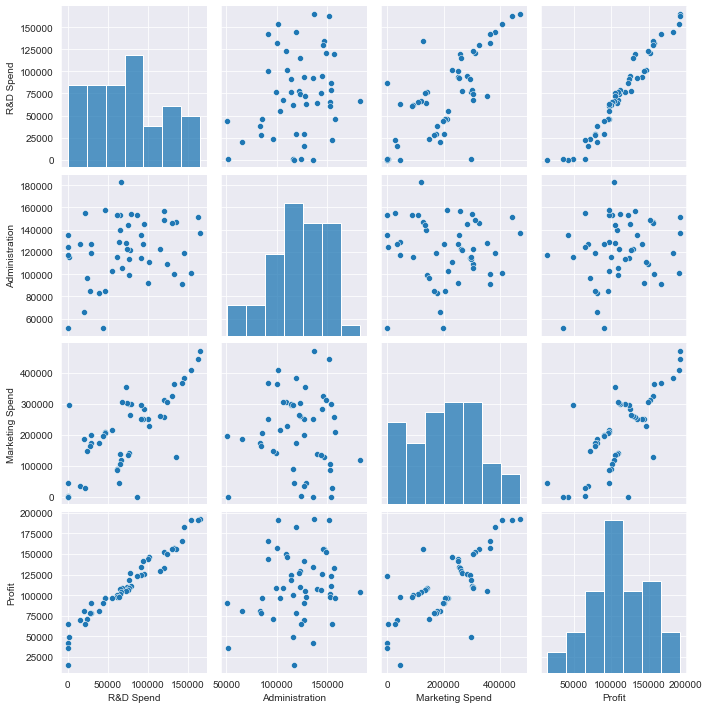

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# changing column name and type for model building

In [8]:
data=data.rename({'R&D Spend':'RDS'},axis=1)
data=data.rename({'Marketing Spend':'MS'},axis=1)
data['State']=data['State'].astype('category')

In [9]:
model=smf.ols('Profit~RDS+Administration+MS',data=data).fit()

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RDS               17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RDS               2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [11]:
model.params

Intercept         50122.192990
RDS                   0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [12]:
(model.rsquared, model.rsquared_adj,model.aic,model.bic)

(0.9507459940683246, 0.9475337762901719, 1058.7714985998055, 1066.419590621518)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 31 May 2023   Prob (F-statistic):           4.53e-30
Time:                        07:02:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression

In [14]:
ml_v = smf.ols('Profit~Administration',data = data).fit()  

#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
(ml_v.rsquared,ml_v.rsquared_adj,ml_v.aic,ml_v.bic)

(0.04028714077757245,
 0.020293122877105274,
 1203.2536701858016,
 1207.077716196658)

In [16]:
ml_w = smf.ols('Profit~MS',data = data).fit()  

#t and p-Values
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [17]:
(ml_w.rsquared,ml_w.rsquared_adj,ml_w.aic,ml_w.bic)

(0.5591535746115515,
 0.5499692740826254,
 1164.3567921009328,
 1168.1808381117892)

In [18]:
ml_x = smf.ols('Profit~MS+Administration',data = data).fit()  

#t and p-Values
print(ml_x.tvalues, '\n', ml_x.pvalues)  

Intercept         1.142741
MS                8.281039
Administration    2.467779
dtype: float64 
 Intercept         2.589341e-01
MS                9.727245e-11
Administration    1.729198e-02
dtype: float64


In [19]:
(ml_x.rsquared,ml_x.rsquared_adj,ml_x.aic,ml_x.bic)

(0.6097229746770663, 0.593115441684601, 1160.2648038638672, 1166.0008728801517)

#  Calculating VIF

In [20]:
rsq_rs = smf.ols('RDS~Administration+MS',data=data).fit().rsquared  
vif_rs = 1/(1-rsq_rs) 

rsq_ad = smf.ols('Administration~RDS+MS',data=data).fit().rsquared  
vif_ad = 1/(1-rsq_ad) 

rsq_ms = smf.ols('MS~RDS+Administration',data=data).fit().rsquared  
vif_ms = 1/(1-rsq_ms) 

# Storing vif values in a data frame
d1 = {'Variables':['RDS','Administration','MS'],
      'VIF':[vif_rs,vif_ad,vif_ms]}

Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,Administration,1.175091
2,MS,2.326773


# Test for Normality of Residuals (Q-Q Plot)

In [21]:
residuals = model.resid
residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

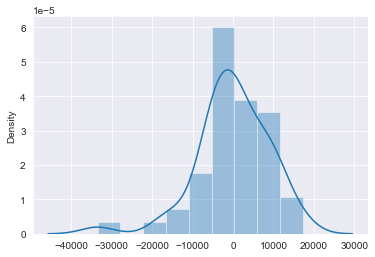

In [22]:
sns.distplot(residuals)

In [23]:
residuals.mean()

7.625203579664231e-11

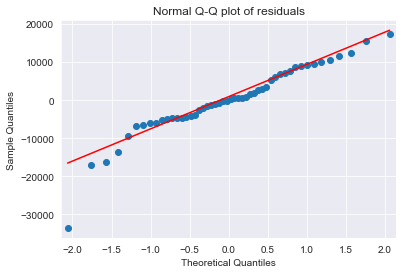

In [24]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(residuals>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [26]:
predictions = model.fittedvalues
predictions

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [27]:
pd.DataFrame({'Actual': data.Profit,
             'Predicted': predictions,
             'Error': residuals})

,Actual,Predicted,Error
0,192261.83,192521.252890,-259.422890
1,191792.06,189156.768232,2635.291768
2,191050.39,182147.279096,8903.110904
3,182901.99,173696.700026,9205.289974
4,166187.94,172139.514183,-5951.574183
5,156991.12,163580.780571,-6589.660571
6,156122.51,158114.096669,-1991.586669
7,155752.60,160021.363048,-4268.763048
8,152211.77,151741.699699,470.070301
9,149759.96,154884.684110,-5124.724110


In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

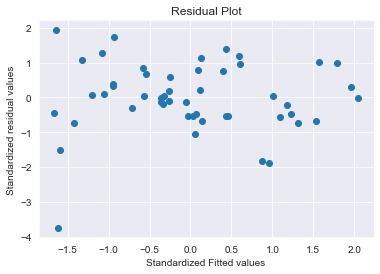

In [29]:
plt.scatter(get_standardized_values(predictions),
            get_standardized_values(residuals))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


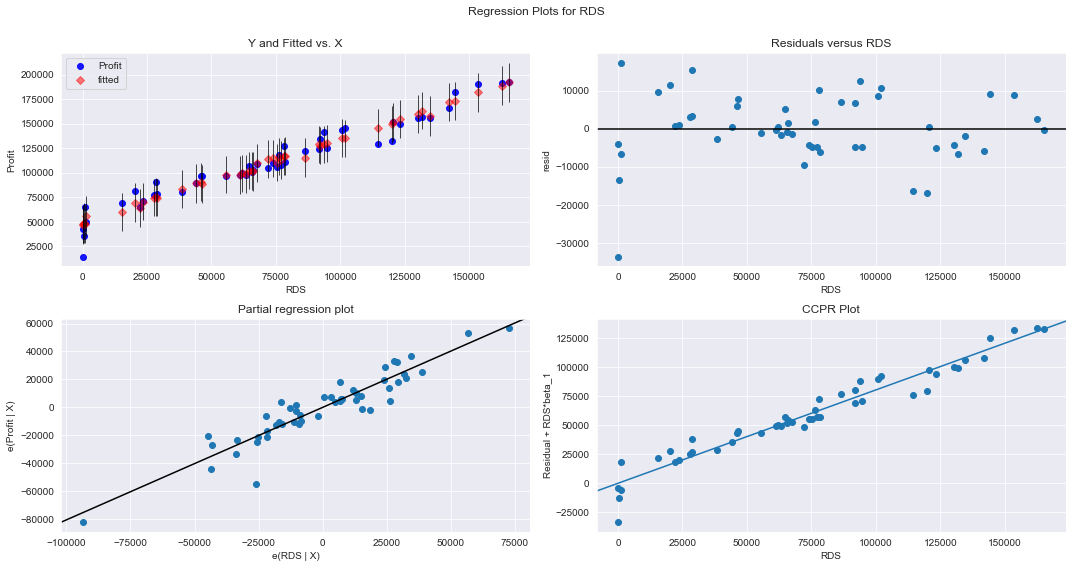

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)
plt.show()

eval_env: 1


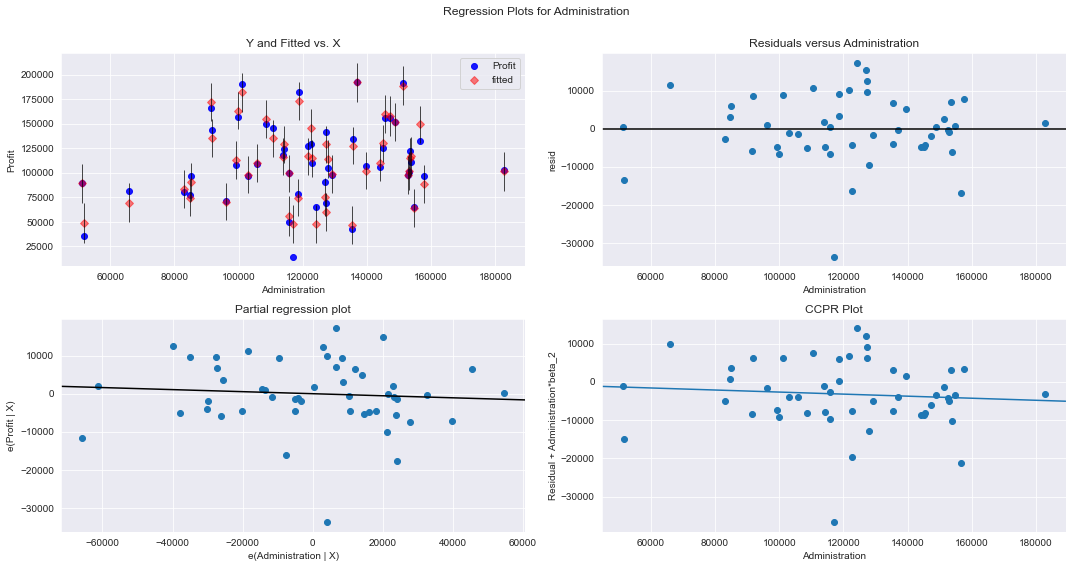

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'Administration', fig=fig)
plt.show()

eval_env: 1


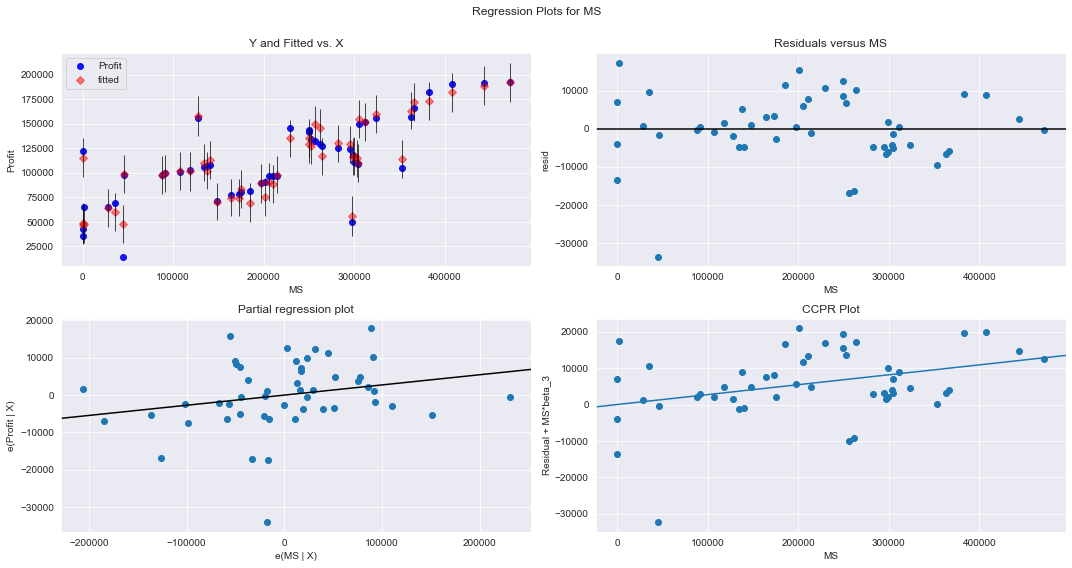

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# cook's Distance

In [33]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [34]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

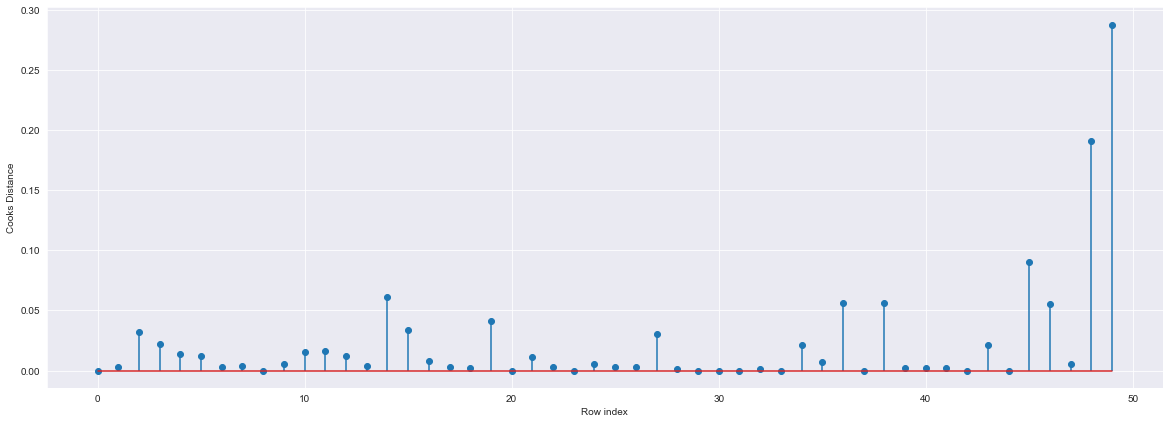

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
(np.argmax(c), np.max(c))

(49, 0.28808229275432634)

# High Influence points

from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

In [37]:
k = data.shape[1] #No. of features (columns)
n = data.shape[0] #No. of observations (rows)

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

# From the above plot, it is evident that data point 49 and 48 are the influencers

In [38]:
data.iloc[[48,49],:]

,RDS,Administration,MS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# improving the model

In [39]:
data_new=pd.read_csv(r'C:\Users\hp\Downloads\50_Startups.csv')
data_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
data2_new = data.rename({'R&D Spend': 'RDS','Marketing Spend':'MS'}, axis=1)
data2_new

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
#Discard the data points which are influencers and reasign the row number (reset_index())
datanew_3=data2_new.drop(data2_new.index[[48,49]],axis=0).reset_index()
datanew_3

,index,RDS,Administration,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
#Drop the original index
datanew_3=datanew_3.drop(['index'],axis=1)
datanew_3

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# build model

In [43]:
model2=smf.ols('Profit~RDS+Administration+MS',data=datanew_3).fit()

In [44]:
(model2.rsquared,model2.rsquared_adj, model2.aic,model2.bic)

(0.9626766170294073, 0.960131840917776, 994.6690439260116, 1002.1538479696432)

In [45]:
#Exclude variable "Administration" and generate R-Squared R-Squared_Adj AIC and BIC values
model3=smf.ols('Profit~RDS+MS',data=datanew_3).fit()

In [46]:
(model3.rsquared,model3.rsquared_adj, model3.aic,model3.bic)

(0.9609119875752479, 0.9591747425785923, 994.886442942941, 1000.5000459756646)

In [47]:
#Exclude variable "Marketing Spend: MS" and generate R-Squared R-Squared_Adj AIC and BIC values
model4=smf.ols('Profit~RDS+Administration',data=datanew_3).fit()

In [48]:
(model4.rsquared,model4.rsquared_adj, model4.aic,model4.bic)

(0.9613542664192156, 0.9596366782600696, 994.3402293693792, 999.9538324021029)

# comparing all models r sqaure and aic bic score

In [49]:
d2={'variables':['model','model2','model3','model4'],
    'rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
    'rsquared_adj':[model.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj],
    'aic score':[model.aic,model2.aic,model3.aic,model4.aic],
    'bic score':[model.bic,model2.bic,model3.bic,model4.bic]}

In [50]:
Vif_frame2=pd.DataFrame(d2)
Vif_frame2

,variables,rsquared,rsquared_adj,aic score,bic score
0,model,0.950746,0.947534,1058.771499,1066.419591
1,model2,0.962677,0.960132,994.669044,1002.153848
2,model3,0.960912,0.959175,994.886443,1000.500046
3,model4,0.961354,0.959637,994.340229,999.953832


We go with model2 comparing r-squared,r-squared_adj,aic and bic value

In [51]:
model2=smf.ols('Profit~RDS+Administration+MS',data=datanew_3).fit()

In [52]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.03e-31
Time:                        07:03:00   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS                0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS                 0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predict for new datapoint

In [53]:
prediction=pd.DataFrame({'RDS':10,'Administration':55,'MS':40},index=[1])
model.predict(prediction)

1    50129.864385
dtype: float64

In [54]:
model.predict(data.iloc[0:8,])

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
5    163580.780571
6    158114.096669
7    160021.363048
dtype: float64

In [55]:
predection1 = model.predict(data)
predection1

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
